In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,precision_score

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [3]:
x=df.iloc[:,:-1]
y=df['Purchased']

In [4]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

# Simple Logistic Regression

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [7]:
lr.score(x_test,y_test)*100

88.75

# Apply RandomOverSampling

In [8]:
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y)

In [9]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(ro_x,ro_y,test_size=0.2,random_state=42)

In [11]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
lr.score(x_test,y_test)*100

83.49514563106796

In [18]:
lr.predict([[42,50000]])

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [20]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[50,  6],
       [11, 36]])

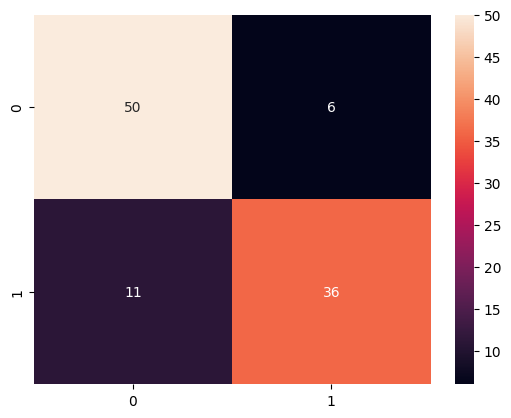

In [21]:
sns.heatmap(cf,annot=True)
plt.show()

In [23]:
precision_score(y_test,lr.predict(x_test))*100

np.float64(85.71428571428571)